In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
orders_df=pd.read_csv(r'C:\Users\sneha\Desktop\food_order_ver 2.csv',index_col=['Order_ID'])

In [4]:
orders_df.head()

,Customer_ID,Restaurant_ID,Order_Date,Order_Time,Delivery_Time,TimeforDelivery,Order_Value,Delivery_Fee,Payment_Method,Discounts_and_Offers,Commission_Fee,Payment_Processing_Fee,Refunds,Discount_Type,Discount_Amount,Commission_Percentage,Cost,Revenue,Profit,Profit_Margin
Order_ID,,,,,,,,,,,,,,,,,,,,
1,C8270,R2924,01-02-2024,01:11:00,02:39:00,88,1914,0,Credit Card,0.05,150,47,0,ON APP,96,0.078370,143,150,7,0.046667
2,C1860,R2054,02-02-2024,22:11:00,22:46:00,35,986,40,Digital Wallet,0.10,198,23,0,BASIC,99,0.200811,162,198,36,0.181818
3,C6390,R2870,31-01-2024,05:54:00,06:52:00,58,937,30,Cash on Delivery,0.15,195,45,0,NEW USER,141,0.208111,216,195,-21,-0.107692
4,C6191,R2642,16-01-2024,22:52:00,23:38:00,46,1463,50,Cash on Delivery,0.00,146,27,0,NONE,0,0.099795,77,146,69,0.472603
5,C6734,R2799,29-01-2024,01:19:00,02:48:00,89,1992,30,Cash on Delivery,50.00,130,50,0,PROMO,50,0.065261,130,130,0,0.000000


In [5]:
orders_df.describe()

,TimeforDelivery,Order_Value,Delivery_Fee,Discounts_and_Offers,Commission_Fee,Payment_Processing_Fee,Refunds,Discount_Amount,Commission_Percentage,Cost,Revenue,Profit,Profit_Margin
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,73.575000,1053.969000,28.620000,10.112150,126.99000,29.832000,28.300000,74.333000,0.197509,161.085000,126.99000,-34.095000,-0.472607
std,26.015133,530.975339,16.958278,20.016301,43.06405,11.627165,49.614228,68.707866,0.226562,85.760472,43.06405,97.661906,1.080963
min,30.000000,104.000000,0.000000,0.000000,50.00000,10.000000,0.000000,0.000000,0.026065,16.000000,50.00000,-389.000000,-7.480770
25%,50.000000,597.750000,20.000000,0.050000,90.00000,20.000000,0.000000,27.000000,0.077625,95.000000,90.00000,-93.000000,-0.879410
50%,74.000000,1038.500000,30.000000,0.100000,127.00000,30.000000,0.000000,50.000000,0.120247,141.000000,127.00000,-21.000000,-0.163888
75%,96.000000,1494.000000,40.000000,0.150000,164.00000,40.000000,50.000000,101.000000,0.207108,215.250000,164.00000,37.250000,0.263514
max,119.000000,1995.000000,50.000000,50.000000,200.00000,50.000000,150.000000,299.000000,1.690910,473.000000,200.00000,176.000000,0.916667


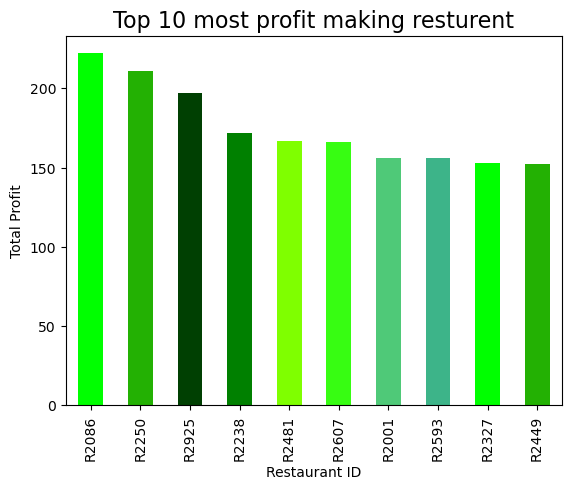

In [6]:
ax3 = orders_df.groupby('Restaurant_ID')['Profit'].sum().nlargest(10).plot(kind='bar',color=('#00FF00','#23B103','#004002','#008000','#7FFF00','#37FD12','#4FC978','#3DB489'))
plt.title('Top 10 most profit making resturent',fontsize = 16)
plt.xlabel('Restaurant ID')
plt.ylabel('Total Profit')
plt.show()

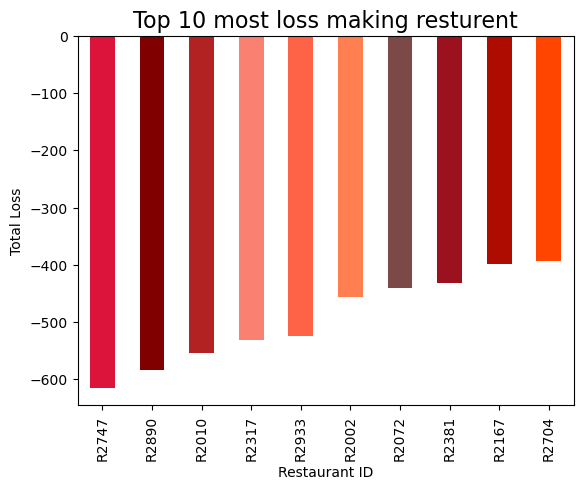

In [7]:
ax3 = orders_df.groupby('Restaurant_ID')['Profit'].sum().nsmallest(10).plot(kind='bar',color=('#dc143c','#800000','#b22222','#fa8072','#ff6347','#ff7f50','#7c4848','#9b111e','#ae0c00','#ff4500'))
plt.title('Top 10 most loss making resturent',fontsize = 16)
plt.xlabel('Restaurant ID')
plt.ylabel('Total Loss')
plt.show()

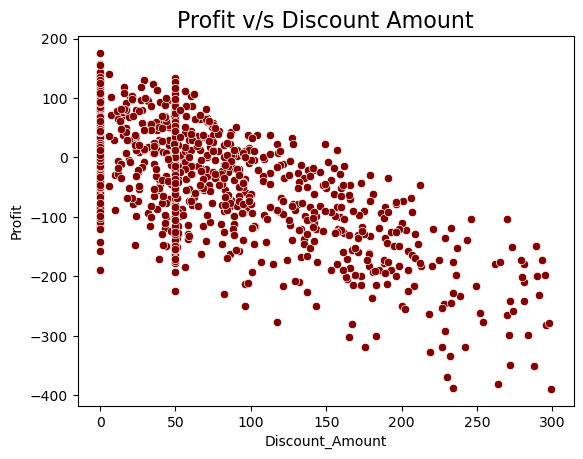

In [8]:
sns.scatterplot(x='Discount_Amount',y='Profit',data=orders_df,color='#800000')
plt.title('Profit v/s Discount Amount',fontsize = 16)
plt.show()

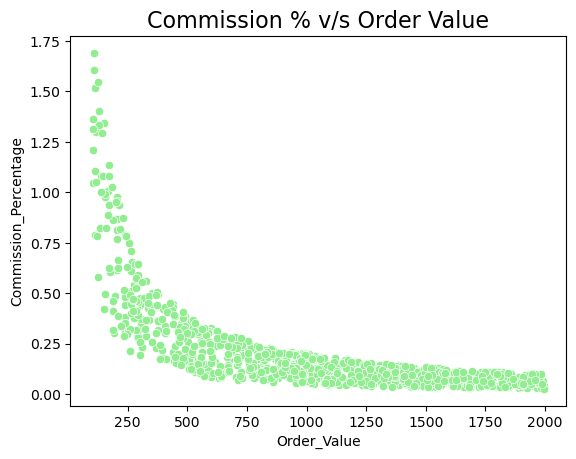

In [9]:
sns.scatterplot(x='Order_Value',y='Commission_Percentage',data=orders_df,color='#90EE90')
plt.title('Commission % v/s Order Value',fontsize = 16)
plt.show()

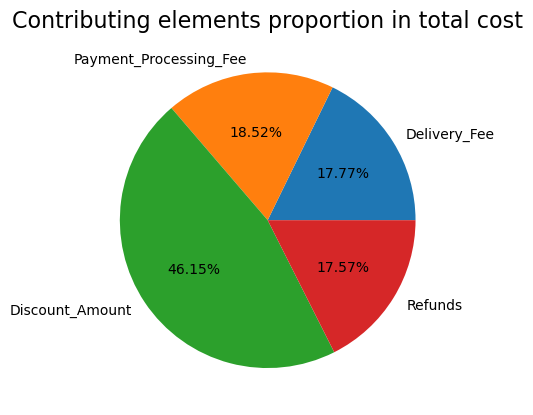

In [10]:
cost_elements = orders_df[['Delivery_Fee','Payment_Processing_Fee','Discount_Amount','Refunds']].sum()
plt.pie(x=cost_elements,labels=cost_elements.index,autopct='%0.2f%%')
plt.title('Contributing elements proportion in total cost',fontsize = 16)
plt.show()

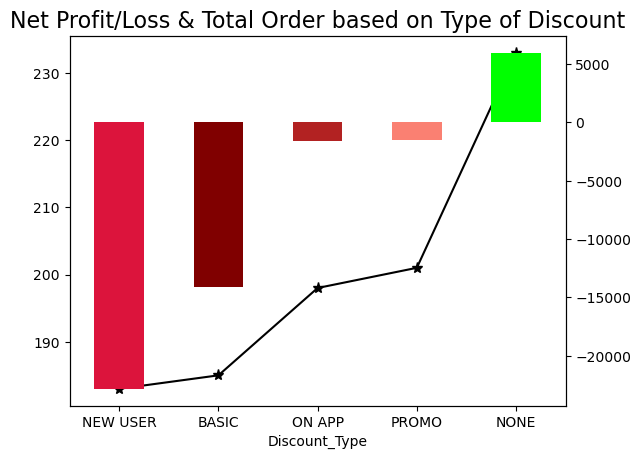

In [52]:
net_profit = orders_df.groupby('Discount_Type')['Profit'].sum().sort_values()
total_orders= orders_df.groupby('Discount_Type')['Customer_ID'].count().sort_values()
p=total_orders.plot(kind='line', color='black', marker='*', markersize=8, label='Total Orders')
q=p.twinx()
q=net_profit.plot(kind='bar', color=('#dc143c','#800000','#b22222','#fa8072','#00FF00'))
plt.title('Net Profit/Loss & Total Order based on Type of Discount',fontsize = 16)
plt.show()

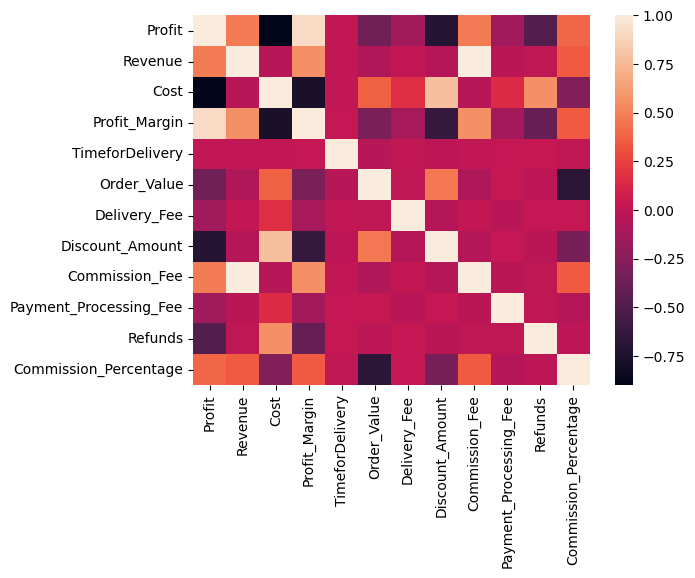

In [25]:
matrix=metricsdf.corr()
sns.heatmap(matrix)
plt.show()